# Regression 
this script using keras to learn the function of 

$y = sin(x) + 0.3 x $


In [1]:
import keras
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


### Generate fake data

In [2]:
np.random.seed(0)

x = np.arange(-10,10,0.05)
noise = 0.5*np.random.randn(len(x))
y = np.sin(x) + 0.3*x + noise


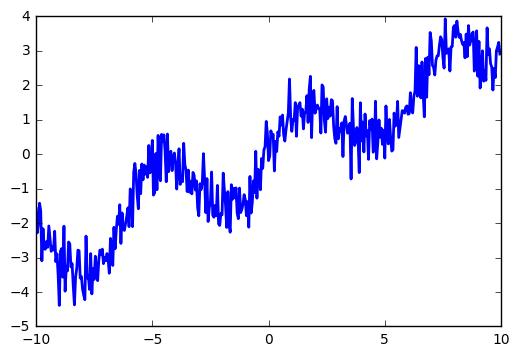

In [3]:
plt.plot(x,y,'b',linewidth=2)

## build baseline model 

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD,RMSprop,Adagrad,Adam

In [5]:
def base_model():
    # to build fully-connected nn model
    model = Sequential()
    model.add(Dense(output_dim=60 , input_dim=1,activation='relu'))
    model.add(Dense(output_dim=60,activation='relu'))
    model.add(Dense(output_dim=1))
    return model

In [6]:
model = base_model()
model.compile(loss = 'mse',optimizer='rmsprop',metrics=['accuracy'])

In [7]:
%timeit model.fit(x, y, nb_epoch=1000, batch_size=20,verbose=0)

1 loop, best of 3: 22.8 s per loop


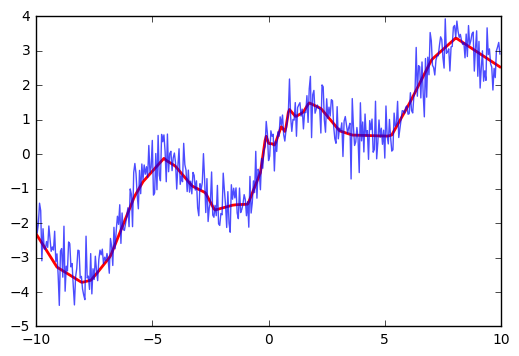

In [8]:
y_pred = model.predict(x)
plt.plot(x,y_pred,color = 'r',linewidth = 2)
plt.plot(x,y,color='b',alpha = 0.7 )
